## Test Adrian's Code

In [2]:
# Load the libraries
library(WGCNA)
library(RaceID)
library(flashClust)

options(stringsAsFactors = FALSE);
enableWGCNAThreads()

Allowing parallel execution with up to 3 working processes.


In [4]:
sc <- readRDS('~/Downloads/sc_object_RaceID.RDS')
mydata <- sc@expdata
dim(mydata)

c(head(colnames(mydata)), head(rownames(mydata)))

[1] 23774  4135

[1] "C81711_1"      "C81711_2"      "C81711_3"      "C81711_4"     
 [5] "C81711_5"      "C81711_6"      "1010001B22Rik" "1700024B05Rik"
 [9] "Cd209f"        "Ugt3a1"        "Usp17la"       "Usp17lb"

In [5]:
# Subset to a specific cluster
# IPC1 cells (cluster 5)
names(sc@cpart)[sc@cpart == 5]
mydata2 <- mydata[, names(sc@cpart)[sc@cpart == 5]]

[1] "C81711_12"  "C81711_25"  "C81711_37"  "C81711_48"  "C81711_54" 
  [6] "C81711_60"  "C81711_78"  "C81712_99"  "C81712_156" "C81712_164"
 [11] "C81712_168" "C81712_190" "C81713_2"   "C81713_18"  "C81713_24" 
 [16] "C81713_51"  "C81713_56"  "C81713_62"  "C81713_68"  "C81713_79" 
 [21] "C81713_92"  "C81713_94"  "C81714_97"  "C81714_108" "C81714_117"
 [26] "C81714_135" "C81714_177" "C81721_2"   "C81721_9"   "C81721_25" 
 [31] "C81721_31"  "C81721_32"  "C81721_44"  "C81722_104" "C81722_117"
 [36] "C81722_122" "C81722_132" "C81722_162" "C81722_168" "C81722_175"
 [41] "C81723_1"   "C81723_2"   "C81723_12"  "C81723_14"  "C81723_36" 
 [46] "C81723_38"  "C81723_40"  "C81723_56"  "C81723_96"  "C81724_104"
 [51] "C81724_120" "C81724_122" "C81724_138" "C81724_140" "C81724_150"
 [56] "C81724_187" "C81731_8"   "C81731_15"  "C81731_20"  "C81731_42" 
 [61] "C81731_86"  "C81732_99"  "C81732_108" "C81732_121" "C81732_131"
 [66] "C81732_136" "C81732_137" "C81732_149" "C81732_154" "C81732_155"
 [71] "C81732_163" "C81732_164" "C81732_166" "C81732_173" "C81733_6"  
 [76] "C81733_7"   "C81733_12"  "C81733_28"  "C81733_51"  "C81733_62" 
 [81] "C81733_72"  "C81733_75"  "C81733_76"  "C81733_79"  "C81734_97" 
 [86] "C81734_105" "C81734_120" "C81734_124" "C81734_126" "C81734_150"
 [91] "C81741_7"   "C81741_36"  "C81741_47"  "C81741_50"  "C81741_51" 
 [96] "C81741_53"  "C81741_56"  "C81741_60"  "C81741_64"  "C81741_72" 
[101] "C81741_74"  "C81741_86"  "C81742_113" "C81742_126" "C81742_131"
[106] "C81742_151" "C81742_183" "C81743_5"   "C81743_12"  "C81743_21" 
[111] "C81743_25"  "C81743_33"  "C81743_37"  "C81743_48"  "C81743_60" 
[116] "C81743_85"  "C81743_95"  "C81744_97"  "C81744_103" "C81744_105"
[121] "C81744_106" "C81744_113" "C81744_124" "C81744_126" "C81744_128"
[126] "C81744_134" "C81744_141" "C81744_151" "C81744_152" "C81744_173"
[131] "K81312_119" "K81312_173" "K81313_62"  "K81321_12"  "K81321_13" 
[136] "K81321_29"  "K81321_39"  "K81321_85"  "K81322_149" "K81322_170"
[141] "K81323_16"  "K81323_82"  "K81323_95"  "K81331_5"   "K81331_69" 
[146] "K81331_87"  "K81333_54"  "K81333_73"  "K81334_106" "K81334_125"
[151] "K81334_146" "K81334_160" "K81334_183" "K81334_190" "K81341_21" 
[156] "K81342_97"  "K81342_106" "K81342_140" "K81342_176" "K81343_1"  
[161] "K81343_17"  "K81411_67"  "K81411_79"  "K81411_84"  "K81411_85" 
[166] "K81412_126" "K81412_129" "K81412_132" "K81412_153" "K81412_169"
[171] "K81412_170" "K81413_21"  "K81413_27"  "K81413_32"  "K81413_42" 
[176] "K81413_61"  "K81413_66"  "K81413_74"  "K81413_78"  "K81414_97" 
[181] "K81414_107" "K81414_151" "K81421_26"  "K81421_48"  "K81421_69" 
[186] "K81422_166" "K81423_8"   "K81423_29"  "K81423_52"  "K81423_76" 
[191] "K81424_107" "K81424_109" "K81424_110" "K81424_157" "K81424_167"
[196] "K81424_175" "K81424_184" "K81431_17"  "K81431_51"  "K81432_128"
[201] "K81432_130" "K81432_133" "K81432_145" "K81433_9"   "K81433_95" 
[206] "K81434_113" "K81434_120" "K81434_174" "K81441_13"  "K81441_30" 
[211] "K81441_32"  "K81441_66"  "K81442_112" "K81442_128" "K81443_52" 
[216] "K81443_61"  "K81444_98"  "K81444_108" "K81444_121" "K81444_177"
[221] "K81444_183"

In [8]:
library(Matrix)
# Remove the rows that sum up to zero
table(rowSums(mydata2) != 0)
dim(mydata2[rowSums(mydata2) != 0, ])
mydata2 <- mydata2[rowSums(mydata2) != 0, ]
dim(mydata2)


FALSE  TRUE 
 9659 14115 

[1] 14115   221

[1] 14115   221

In [9]:
gene.names <- sort(rownames(mydata2))
head(gene.names)
mydata2.trans <- t(as.matrix(mydata2))
dim(mydata2.trans)

[1] "0610007P14Rik" "0610009B22Rik" "0610009E02Rik" "0610009L18Rik"
[5] "0610009O20Rik" "0610010F05Rik"

[1]   221 14115

In [10]:
datExpr = mydata2.trans
dim(datExpr)
####  Note: In a very naive approach I am using the 14115 genes that came out after filtering rows summing up to zero.
#           A better way of difining the nuber of genes is still lacking.

powers = c(c(1:10), seq(from = 12, to=20, by=2));
sft = pickSoftThreshold(datExpr, 
                        dataIsExpr = TRUE,
                        powerVector = powers,
                        corFnc = cor,
                        corOptions = list(use = 'p'),
                        networkType = "signed")

[1]   221 14115

   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1    0.616 -32.20          0.923 7220.00  7200.000 7900.0
2      2    0.694 -17.30          0.940 3720.00  3690.000 4500.0
3      3    0.746 -12.40          0.953 1930.00  1900.000 2610.0
4      4    0.794  -9.74          0.957 1010.00   987.000 1550.0
5      5    0.836  -8.12          0.962  530.00   516.000  936.0
6      6    0.873  -6.99          0.963  282.00   271.000  580.0
7      7    0.903  -6.23          0.970  151.00   144.000  368.0
8      8    0.924  -5.58          0.972   82.40    77.400  240.0
9      9    0.951  -4.94          0.979   45.60    42.100  160.0
10    10    0.974  -4.35          0.986   25.80    23.100  110.0
11    12    0.944  -3.71          0.973    8.98     7.260   63.2
12    14    0.878  -2.77          0.898    3.74     2.350   40.8
13    16    0.747  -2.12          0.714    1.99     0.795   30.9
14    18    0.937  -1.53          0.956    1.35     0.278   29.1
15    20    0.923  -1.33 

In [11]:
# Plot the results
#sizeGrWindow(9, 5)
options(repr.plot.width= 15, repr.plot.height = 7)
par(mfrow = c(1,2));
cex1 = 0.9;

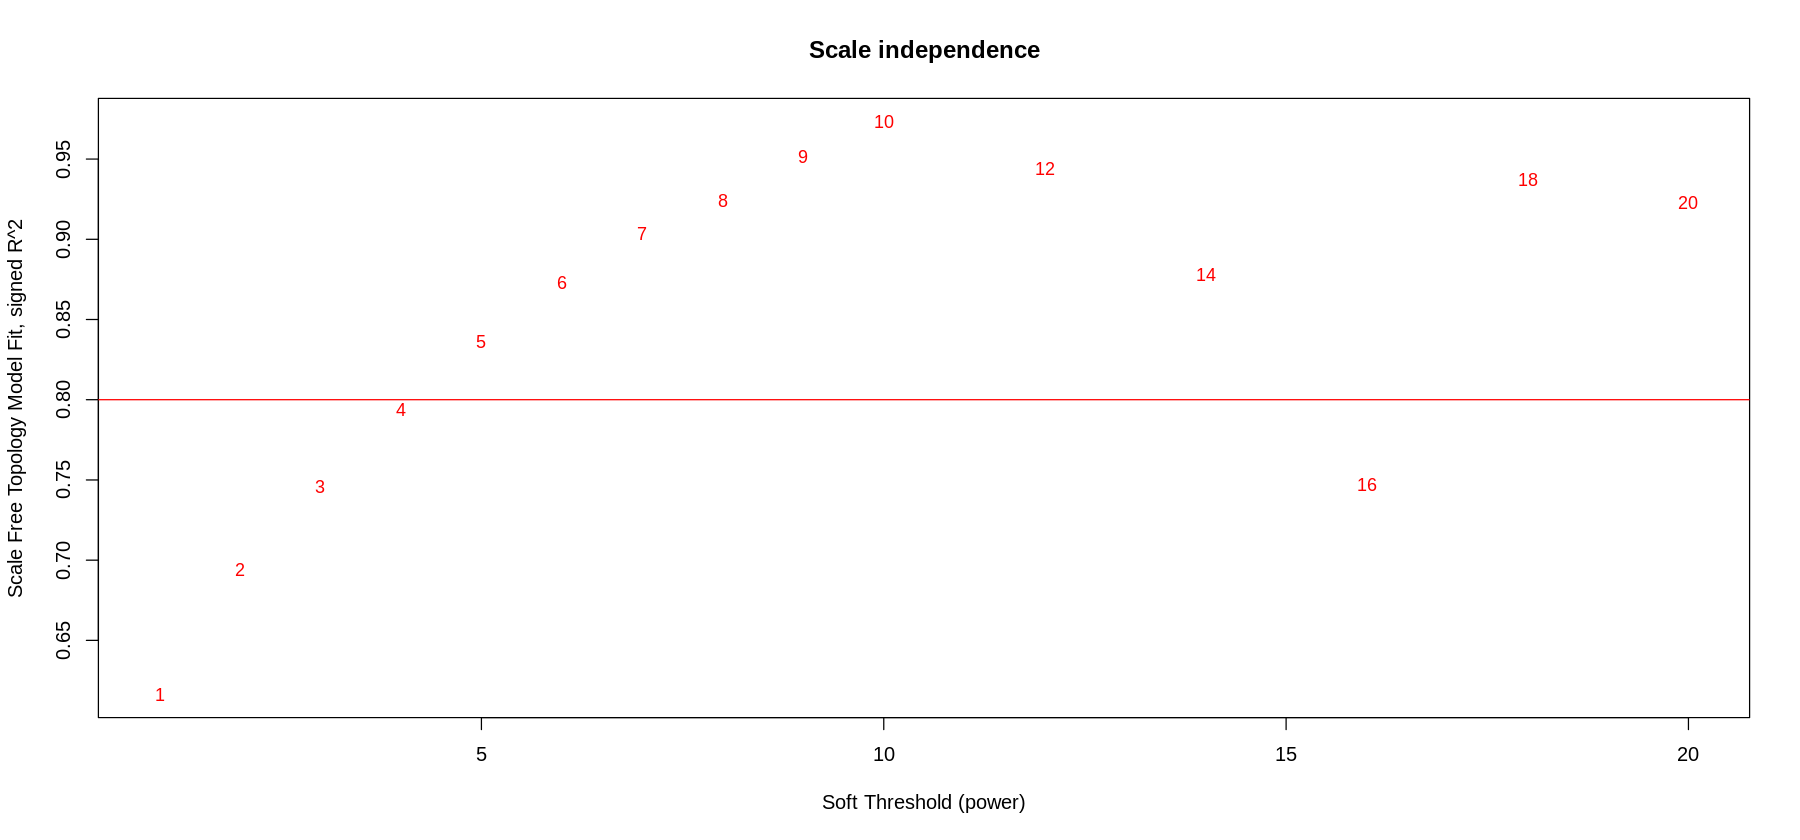

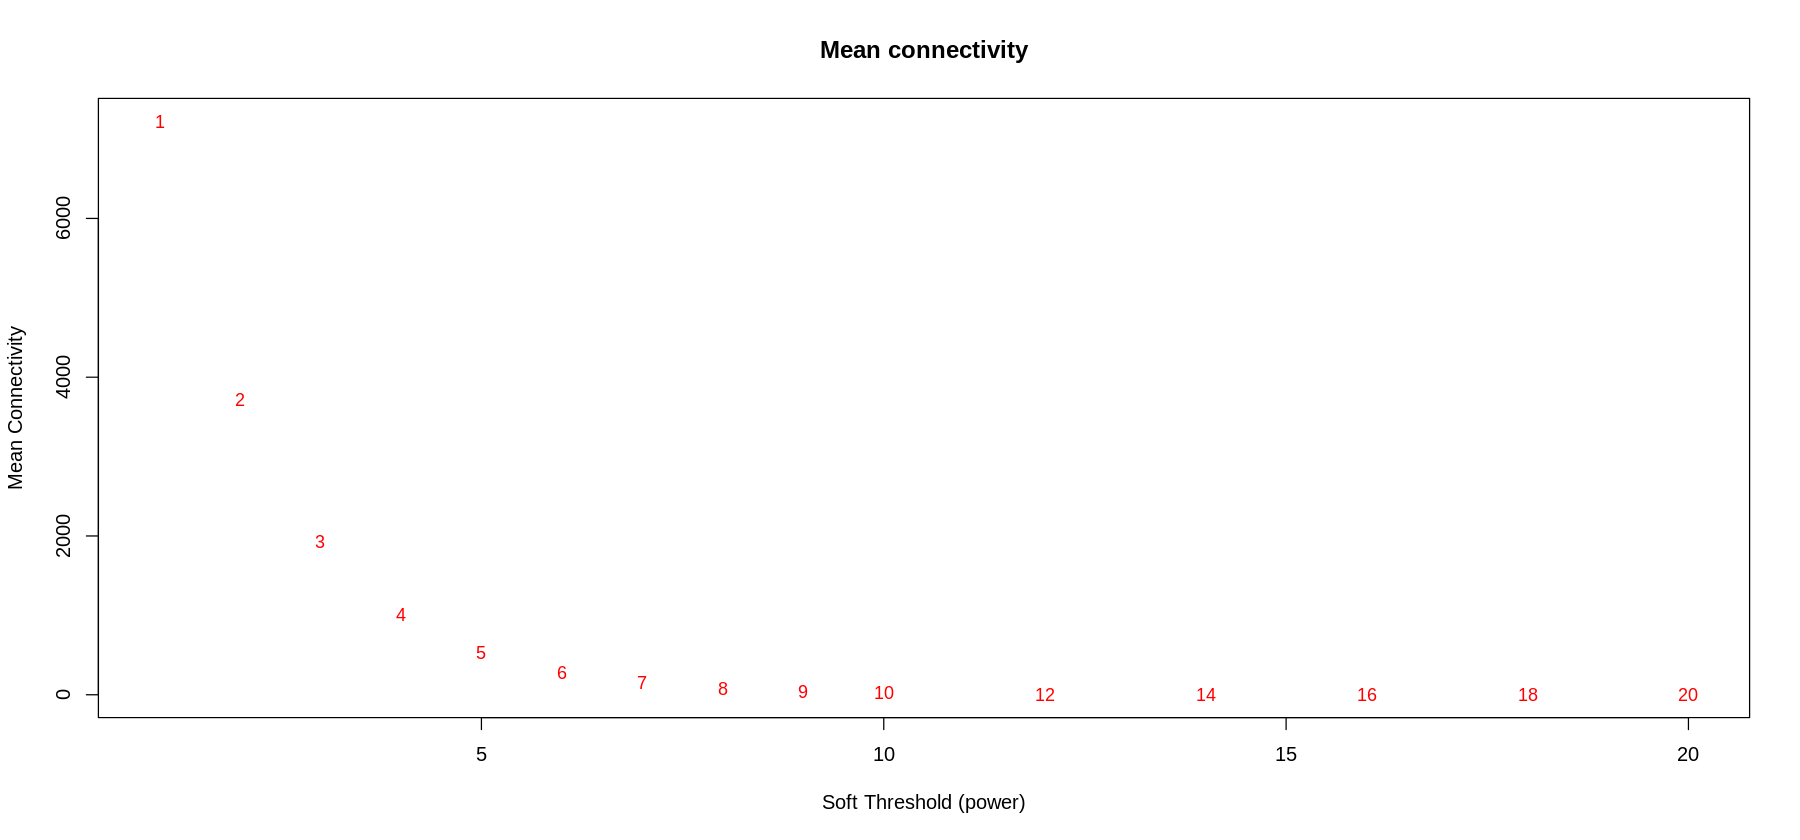

In [12]:
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",
     ylab="Scale Free Topology Model Fit, signed R^2",
     type="n", main = paste("Scale independence"))
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red")

# Red line corresponds to using an R^2 cut-off
abline(h=0.80,col="red")

# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
     xlab="Soft Threshold (power)",
     ylab="Mean Connectivity",
     type="n",main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], 
     labels=powers, cex=cex1,
     col="red")

In [ ]:
softPower = 8;
#calclute the adjacency matrix
adj = adjacency(datExpr,
                type = "signed", 
                power = softPower);
# turn adjacency matrix into a topological overlap matrix (TOM)
# to minimize the effects of noise and spurious associations
TOM = TOMsimilarityFromExpr(datExpr,
                            networkType = "signed",
                            TOMType = "signed",
                            power = softPower)

colnames(TOM) =rownames(TOM) = gene.names
dissTOM=1-TOM

In [ ]:
#hierarchical clustering of the genes based on the TOM dissimilarity measure
options(repr.plot.width= 15, repr.plot.height = 10)
geneTree = flashClust(as.dist(dissTOM),
                      method="average");

#plot the resulting clustering tree (dendrogram)
plot(geneTree, xlab="", sub="",cex=0.3);


# Set the minimum module size
minModuleSize = 20;

# Module identification using dynamic tree cut

# NOTE: in this step I used the second option (instead of the first one that is commented now) and it did work.
#dynamicMods = cutreeDynamic(dendro = geneTree, cutHeight = 0.99, method="tree", minClusterSize = minModuleSize);
dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM, method="hybrid", deepSplit = 2, pamRespectsDendro = FALSE, minClusterSize = minModuleSize);


#the following command gives the module labels and the size of each module. Lable 0 is reserved for unassigned genes
table(dynamicMods)

In [ ]:
#Plot the module assignment under the dendrogram; note: The grey color is reserved for unassigned genes
dynamicColors = labels2colors(dynamicMods)
table(dynamicColors)

plotDendroAndColors(geneTree, dynamicColors, "Dynamic Tree Cut", 
                    dendroLabels = FALSE, hang = 0.03, 
                    addGuide = TRUE, guideHang = 0.05, 
                    main = "Gene dendrogram and module colors")

In [ ]:
#set the diagonal of the dissimilarity to NA 
options(repr.plot.width= 20, repr.plot.height = 15)
diag(dissTOM) = NA;
#Visualize the Tom plot. Raise the dissimilarity matrix to a power  to bring out the module structure
#sizeGrWindow(7,7)
TOMplot(dissTOM^4, geneTree, as.character(dynamicColors))
